In [1]:
import numpy as np
from progressbar import ProgressBar
from algorithm.algorithms import * 
from bandit_process.arm_generator import *
from matplotlib import pyplot as plt
import matplotlib;matplotlib.rcParams['figure.figsize'] = (8,5)
import os
import math
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.75)

the environment

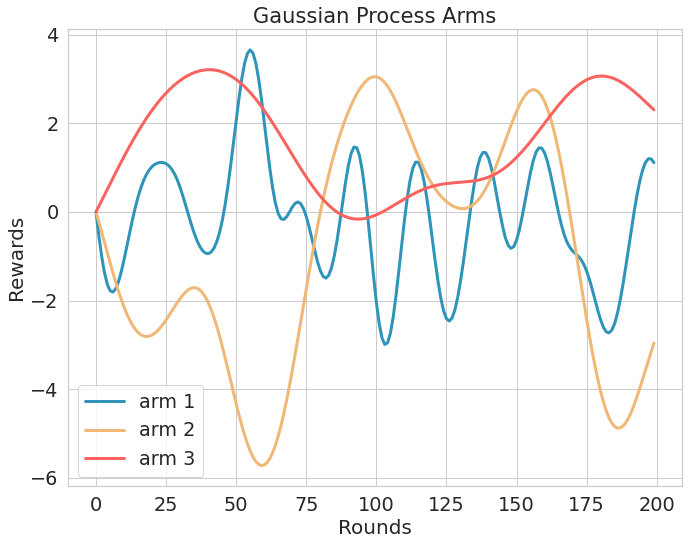

In [2]:
arm1=expect_reward_generator(200,lengthscale=8,variance=5,Smooth=True,Plot=False)
arm2=expect_reward_generator(200,lengthscale=16,variance=5,Smooth=True,Plot=False)
arm3=expect_reward_generator(200,lengthscale=32,variance=5,Smooth=True,Plot=False)

plt.figure(figsize=(10, 8))
plt.plot(arm1,label='arm 1',linewidth=3,color='#2E94B9')
plt.plot(arm2,label='arm 2',linewidth=3,color='#F0B775')
plt.plot(arm3,label='arm 3',linewidth=3,color='#fa625f')
plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Rewards',fontsize=20)
plt.title('Gaussian Process Arms')
plt.tight_layout()
plt.legend()

#plt.savefig('Gaussian Process Arms.png')

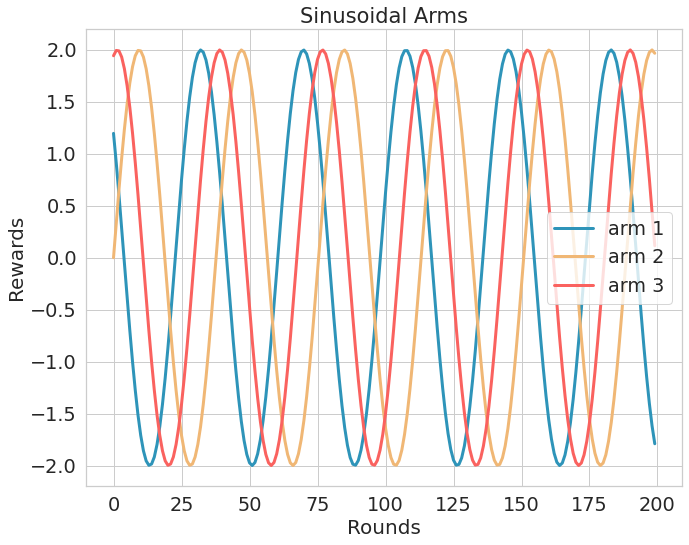

In [3]:
arm1 = expect_reward_generato_sin(200,6,2,15,Plot=False)
arm2 = expect_reward_generato_sin(200,6,2,0,Plot=False)
arm3 = expect_reward_generato_sin(200,6,2,8,Plot=False)


plt.figure(figsize=(10, 8))
plt.plot(arm1,label='arm 1',linewidth=3,color='#2E94B9')
plt.plot(arm2,label='arm 2',linewidth=3,color='#F0B775')
plt.plot(arm3,label='arm 3',linewidth=3,color='#fa625f')
plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Rewards',fontsize=20)
plt.title('Sinusoidal Arms')
plt.tight_layout()
plt.legend()

#plt.savefig('Sinusoidal Arms.png')

Experiment 1

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


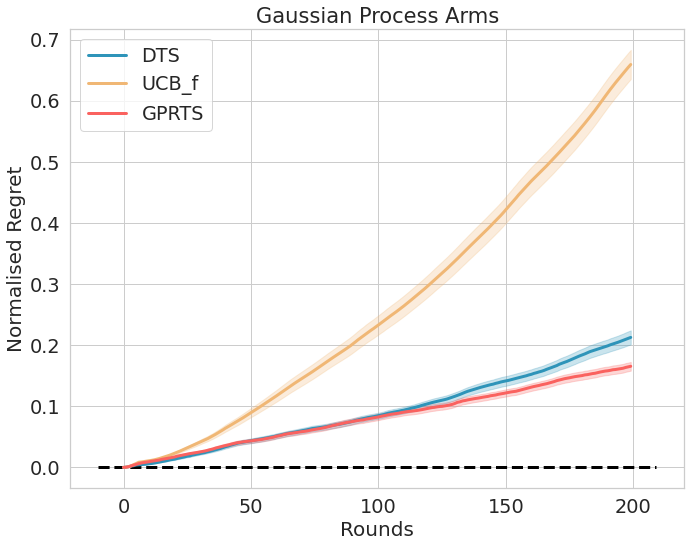

In [4]:
T = 200
N = 100

EF_record = my_data = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment1 data/EF_record.csv'), delimiter=',')
UCB_record = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment1 data/UCB_record.csv'), delimiter=',')
GPR_record = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment1 data/GPR_record.csv'), delimiter=',')
GPR_mismatch_record = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment1 data/GPR_mismatch_record.csv'), delimiter=',')


EF_cumsum=np.cumsum(EF_record,axis=1)
UCB_cumsum=np.cumsum(UCB_record,axis=1)
GPR_cumsum=np.cumsum(GPR_record,axis=1)
GPR_mismatch_cumsum=np.cumsum(GPR_mismatch_record,axis=1)


EF_cumsum_average=np.mean(EF_cumsum,axis=0)
UCB_cumsum_average=np.mean(UCB_cumsum,axis=0)
GPR_cumsum_average=np.mean(GPR_cumsum,axis=0)
GPR_cumsum_mismatch_average=np.mean(GPR_mismatch_cumsum,axis=0)

EF_cumsum_std=np.sqrt(np.var(EF_cumsum,axis=0))/math.sqrt(N)
UCB_cumsum_std=np.sqrt(np.var(UCB_cumsum,axis=0))/math.sqrt(N)
GPR_cumsum_std=np.sqrt(np.var(GPR_cumsum,axis=0))/math.sqrt(N)
GPR_mismatch_cumsum_std=np.sqrt(np.var(GPR_mismatch_cumsum,axis=0))/math.sqrt(N)

plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

plt.plot(EF_cumsum_average,linewidth=3,color='#2E94B9',label='DTS')
plt.fill_between(range(T), EF_cumsum_average-EF_cumsum_std, EF_cumsum_average+EF_cumsum_std, color='#2E94B9',alpha=0.25)

plt.plot(UCB_cumsum_average,linewidth=3,color='#F0B775',label='UCB_f')
plt.fill_between(range(T), UCB_cumsum_average-UCB_cumsum_std, UCB_cumsum_average+UCB_cumsum_std ,color='#F0B775',alpha=0.25)

# plt.plot(GPR_cumsum_average,label='Gaussian process regression (no model mismatch)')
# plt.fill_between(range(T), GPR_cumsum_average-GPR_cumsum_std, GPR_cumsum_average+GPR_cumsum_std, alpha=0.25)

plt.plot(GPR_cumsum_mismatch_average,linewidth=3,color='#fa625f' ,label='GPRTS')
plt.fill_between(range(T), GPR_cumsum_mismatch_average-GPR_mismatch_cumsum_std, GPR_cumsum_mismatch_average+GPR_mismatch_cumsum_std,color='#fa625f', alpha=0.25)

plt.hlines(0, *plt.xlim(), color='black', linestyle='--', linewidth=3, zorder=2)

plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Normalised Regret',fontsize=20)
plt.title('Gaussian Process Arms')
plt.tight_layout()
plt.legend()


#plt.savefig('GPA_exp.png')


Experiment 2


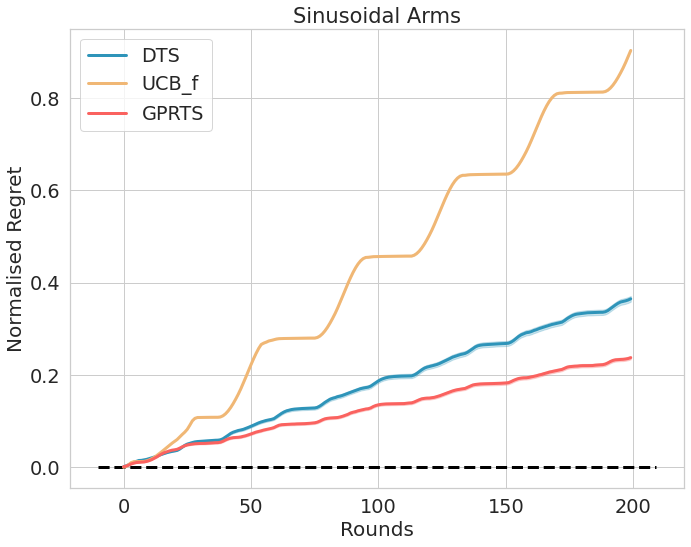

In [5]:
T = 200
N = 100

EF_record  = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment2 data/EF_record.csv'), delimiter=',')
UCB_record = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment2 data/UCB_record.csv'), delimiter=',')
GPR_record = np.genfromtxt(os.path.join(os.getcwd(),'result/experiment2 data/GPR_record.csv'), delimiter=',')



EF_cumsum=np.cumsum(EF_record,axis=1)
UCB_cumsum=np.cumsum(UCB_record,axis=1)
GPR_cumsum=np.cumsum(GPR_record,axis=1)


EF_cumsum_average=np.mean(EF_cumsum,axis=0)
UCB_cumsum_average=np.mean(UCB_cumsum,axis=0)
GPR_cumsum_average=np.mean(GPR_cumsum,axis=0)

EF_cumsum_std=np.sqrt(np.var(EF_cumsum,axis=0))/math.sqrt(N)
UCB_cumsum_std=np.sqrt(np.var(UCB_cumsum,axis=0))/math.sqrt(N)
GPR_cumsum_std=np.sqrt(np.var(GPR_cumsum,axis=0))/math.sqrt(N)

plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

plt.plot(EF_cumsum_average,linewidth=3,color='#2E94B9',label='DTS')
plt.fill_between(range(T), EF_cumsum_average-EF_cumsum_std, EF_cumsum_average+EF_cumsum_std,color='#2E94B9', alpha=0.25)

plt.plot(UCB_cumsum_average,linewidth=3,label='UCB_f',color='#F0B775')
plt.fill_between(range(T), UCB_cumsum_average-UCB_cumsum_std, UCB_cumsum_average+UCB_cumsum_std,color='#F0B775', alpha=0.25)

plt.plot(GPR_cumsum_average,linewidth=3,label='GPRTS',color='#fa625f')
plt.fill_between(range(T), GPR_cumsum_average-GPR_cumsum_std, GPR_cumsum_average+GPR_cumsum_std, color='#fa625f',alpha=0.25)

plt.hlines(0, *plt.xlim(), color='black', linestyle='--', linewidth=3, zorder=2)




plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Normalised Regret',fontsize=20)
plt.title('Sinusoidal Arms')
plt.tight_layout()
plt.legend()


#plt.savefig('SA_exp.png')



With Switching Cost

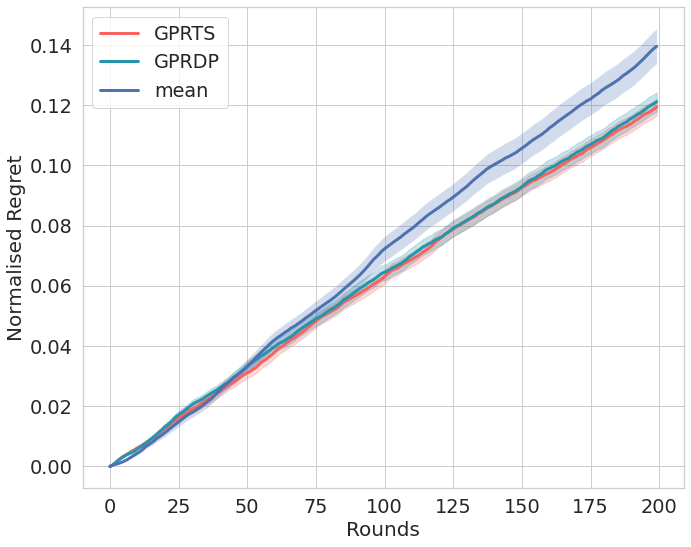

In [5]:
N = 250
T = 200

regret_record1 = np.genfromtxt(os.path.join(os.getcwd(),'result/noraml_cost0.csv'), delimiter=',')
regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'result/DP_cost0.csv'), delimiter=',')
regret_record3 = np.genfromtxt(os.path.join(os.getcwd(),'mean_cost0.csv'), delimiter=',')

regret_cumsum1=np.cumsum(regret_record1,axis=1)
regret_cumsum2=np.cumsum(regret_record2,axis=1)
regret_cumsum3=np.cumsum(regret_record3,axis=1)


cumsum_average1=np.mean(regret_cumsum1,axis=0)
cumsum_average2=np.mean(regret_cumsum2,axis=0)
cumsum_average3=np.mean(regret_cumsum3,axis=0)

cumsum_std1=np.sqrt(np.var(regret_cumsum1,axis=0))/math.sqrt(N)
cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)
cumsum_std3=np.sqrt(np.var(regret_cumsum3,axis=0))/math.sqrt(N)

plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

plt.plot(cumsum_average1,color='#fa625f',linewidth=3,label='GPRTS')
plt.fill_between(range(T), cumsum_average1-cumsum_std1, cumsum_average1+cumsum_std1, color='#fa625f', alpha=0.25)

plt.plot(cumsum_average2,label='GPRDP',linewidth=3,color='#2694ab')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='#2694ab', alpha=0.25)

plt.plot(cumsum_average3,label='mean',linewidth=3)
plt.fill_between(range(T), cumsum_average3-cumsum_std3, cumsum_average3+cumsum_std3, alpha=0.25)

plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Normalised Regret',fontsize=20)
plt.tight_layout()
#plt.title('Switching Cost = 0')
plt.legend()

#plt.savefig('SC0.png')

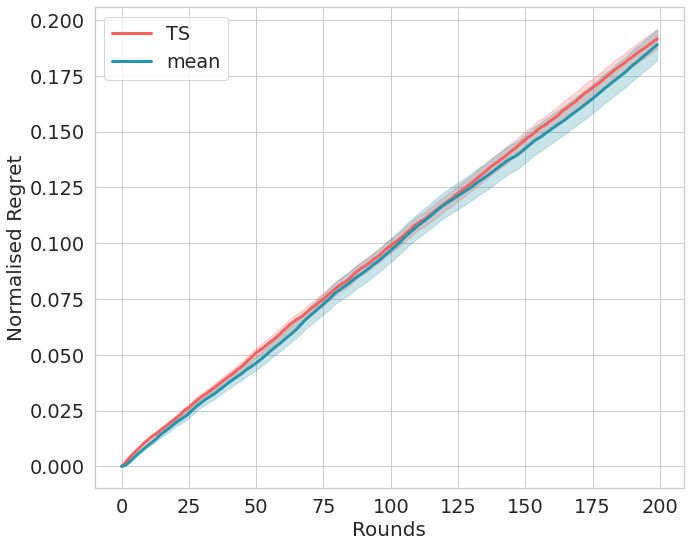

In [8]:
N = 250
T = 200

regret_record1 = np.genfromtxt(os.path.join(os.getcwd(),'result/DP_cost075_step_'+str(0)+'.csv'), delimiter=',')
regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'mean_cost0.75.csv'), delimiter=',')

regret_cumsum1=np.cumsum(regret_record1,axis=1)
regret_cumsum2=np.cumsum(regret_record2,axis=1)


cumsum_average1=np.mean(regret_cumsum1,axis=0)
cumsum_average2=np.mean(regret_cumsum2,axis=0)

cumsum_std1=np.sqrt(np.var(regret_cumsum1,axis=0))/math.sqrt(N)
cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)

plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

plt.plot(cumsum_average1,color='#fa625f',linewidth=3,label='TS')
plt.fill_between(range(T), cumsum_average1-cumsum_std1, cumsum_average1+cumsum_std1, color='#fa625f', alpha=0.25)

plt.plot(cumsum_average2,label='mean',linewidth=3,color='#2694ab')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='#2694ab', alpha=0.25)

plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Normalised Regret',fontsize=20)
plt.tight_layout()
#plt.title('Switching Cost = 1.5')
plt.legend()

#plt.savefig('SC15.png')

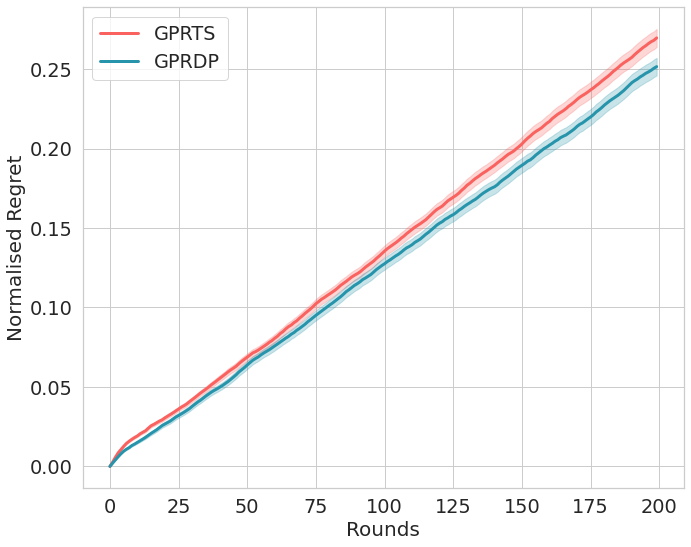

In [7]:
N = 250
T = 200

regret_record1 = np.genfromtxt(os.path.join(os.getcwd(),'result/noraml_cost1_5.csv'), delimiter=',')
regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'result/DP_cost1_5.csv'), delimiter=',')

regret_cumsum1=np.cumsum(regret_record1,axis=1)
regret_cumsum2=np.cumsum(regret_record2,axis=1)


cumsum_average1=np.mean(regret_cumsum1,axis=0)
cumsum_average2=np.mean(regret_cumsum2,axis=0)

cumsum_std1=np.sqrt(np.var(regret_cumsum1,axis=0))/math.sqrt(N)
cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)

plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

plt.plot(cumsum_average1,color='#fa625f',linewidth=3,label='GPRTS')
plt.fill_between(range(T), cumsum_average1-cumsum_std1, cumsum_average1+cumsum_std1, color='#fa625f', alpha=0.25)

plt.plot(cumsum_average2,label='GPRDP',linewidth=3,color='#2694ab')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='#2694ab', alpha=0.25)

plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Normalised Regret',fontsize=20)
plt.tight_layout()
#plt.title('Switching Cost = 1.5')
plt.legend()

#plt.savefig('SC15.png')

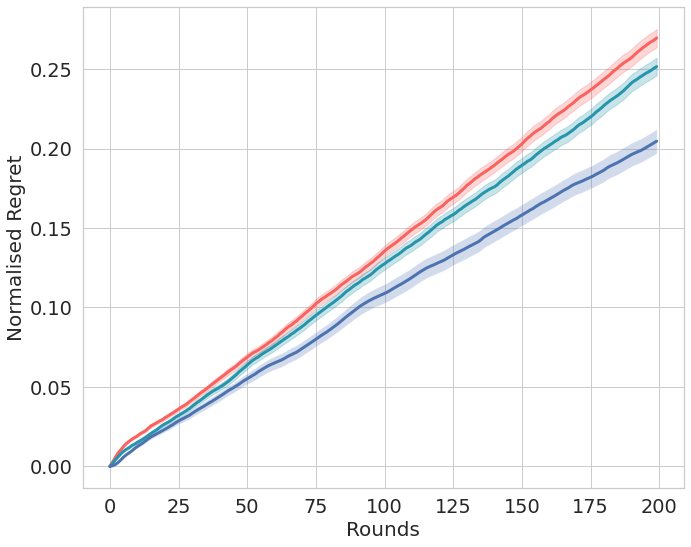

In [7]:
N = 250
T = 200

regret_record1 = np.genfromtxt(os.path.join(os.getcwd(),'result/noraml_cost1_5.csv'), delimiter=',')
regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'result/DP_cost1_5.csv'), delimiter=',')
regret_record3 = np.genfromtxt(os.path.join(os.getcwd(),'mean_cost1.5.csv'), delimiter=',')

regret_cumsum1=np.cumsum(regret_record1,axis=1)
regret_cumsum2=np.cumsum(regret_record2,axis=1)
regret_cumsum3=np.cumsum(regret_record3,axis=1)


cumsum_average1=np.mean(regret_cumsum1,axis=0)
cumsum_average2=np.mean(regret_cumsum2,axis=0)
cumsum_average3=np.mean(regret_cumsum3,axis=0)

cumsum_std1=np.sqrt(np.var(regret_cumsum1,axis=0))/math.sqrt(N)
cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)
cumsum_std3=np.sqrt(np.var(regret_cumsum3,axis=0))/math.sqrt(N)

plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

plt.plot(cumsum_average1,color='#fa625f',linewidth=3,label='GPRTS')
plt.fill_between(range(T), cumsum_average1-cumsum_std1, cumsum_average1+cumsum_std1, color='#fa625f', alpha=0.25)

plt.plot(cumsum_average2,label='GPRDP',linewidth=3,color='#2694ab')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='#2694ab', alpha=0.25)

plt.plot(cumsum_average3,label='mean',linewidth=3)
plt.fill_between(range(T), cumsum_average3-cumsum_std3, cumsum_average3+cumsum_std3, alpha=0.25)

plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Normalised Regret',fontsize=20)
plt.tight_layout()
#plt.title('Switching Cost 

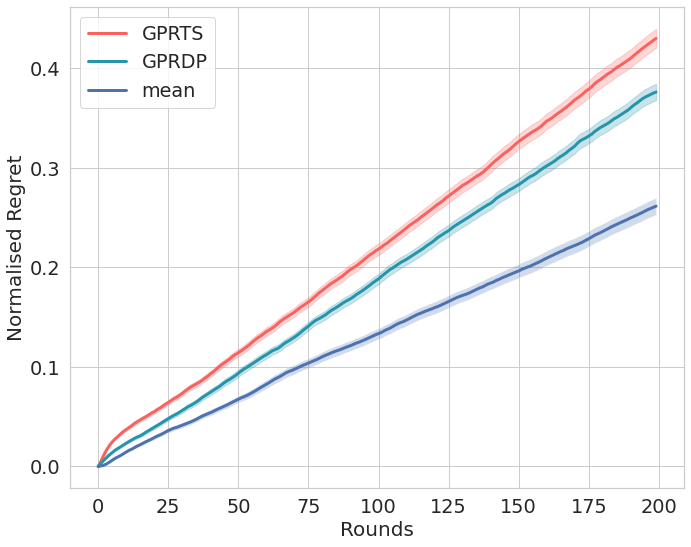

In [6]:
N = 250
T = 200

regret_record1 = np.genfromtxt(os.path.join(os.getcwd(),'result/noraml_cost3.csv'), delimiter=',')
regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'result/DP_cost3.csv'), delimiter=',')
regret_record3 = np.genfromtxt(os.path.join(os.getcwd(),'mean_cost3.csv'), delimiter=',')

regret_cumsum1=np.cumsum(regret_record1,axis=1)
regret_cumsum2=np.cumsum(regret_record2,axis=1)
regret_cumsum3=np.cumsum(regret_record3,axis=1)


cumsum_average1=np.mean(regret_cumsum1,axis=0)
cumsum_average2=np.mean(regret_cumsum2,axis=0)
cumsum_average3=np.mean(regret_cumsum3,axis=0)

cumsum_std1=np.sqrt(np.var(regret_cumsum1,axis=0))/math.sqrt(N)
cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)
cumsum_std3=np.sqrt(np.var(regret_cumsum3,axis=0))/math.sqrt(N)

plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

plt.plot(cumsum_average1,color='#fa625f',linewidth=3,label='GPRTS')
plt.fill_between(range(T), cumsum_average1-cumsum_std1, cumsum_average1+cumsum_std1, color='#fa625f', alpha=0.25)

plt.plot(cumsum_average2,label='GPRDP',linewidth=3,color='#2694ab')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='#2694ab', alpha=0.25)

plt.plot(cumsum_average3,label='mean',linewidth=3)
plt.fill_between(range(T), cumsum_average3-cumsum_std3, cumsum_average3+cumsum_std3, alpha=0.25)

plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Normalised Regret',fontsize=20)
plt.tight_layout()
#plt.title('Switching Cost = 0')
plt.legend()

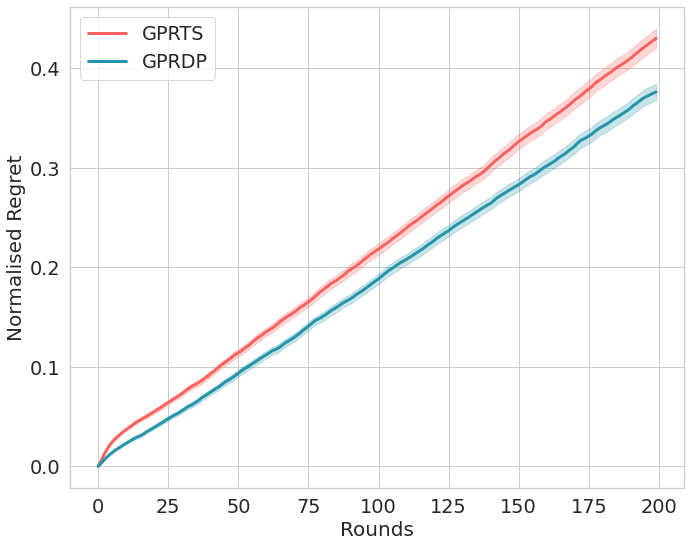

In [8]:
N = 250
T = 200

regret_record1 = np.genfromtxt(os.path.join(os.getcwd(),'result/noraml_cost3.csv'), delimiter=',')
regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'result/DP_cost3.csv'), delimiter=',')

regret_cumsum1=np.cumsum(regret_record1,axis=1)
regret_cumsum2=np.cumsum(regret_record2,axis=1)


cumsum_average1=np.mean(regret_cumsum1,axis=0)
cumsum_average2=np.mean(regret_cumsum2,axis=0)

cumsum_std1=np.sqrt(np.var(regret_cumsum1,axis=0))/math.sqrt(N)
cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)

plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

plt.plot(cumsum_average1,color='#fa625f',linewidth=3,label='GPRTS')
plt.fill_between(range(T), cumsum_average1-cumsum_std1, cumsum_average1+cumsum_std1, color='#fa625f', alpha=0.25)

plt.plot(cumsum_average2,label='GPRDP',linewidth=3,color='#2694ab')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='#2694ab', alpha=0.25)

plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Normalised Regret',fontsize=20)
plt.tight_layout()
#plt.title('Switching Cost = 3')
plt.legend()

#plt.savefig('SC3.png')

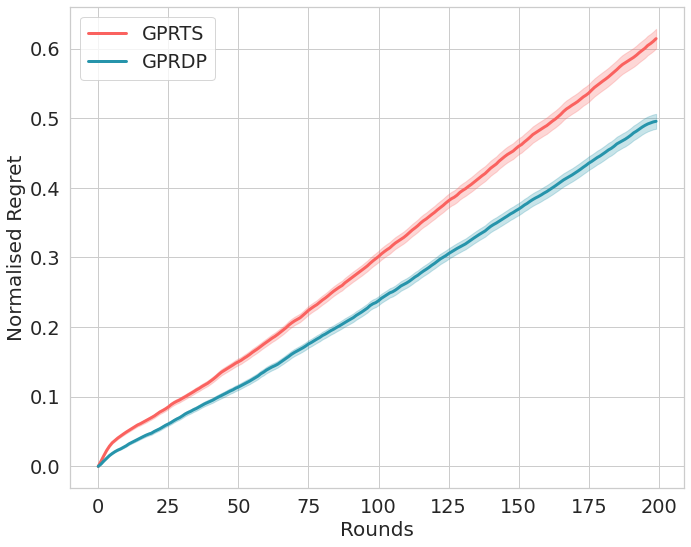

In [9]:
N = 250
T = 200

regret_record1 = np.genfromtxt(os.path.join(os.getcwd(),'result/noraml_cost5.csv'), delimiter=',')
regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'result/DP_cost5.csv'), delimiter=',')

regret_cumsum1=np.cumsum(regret_record1,axis=1)
regret_cumsum2=np.cumsum(regret_record2,axis=1)


cumsum_average1=np.mean(regret_cumsum1,axis=0)
cumsum_average2=np.mean(regret_cumsum2,axis=0)

cumsum_std1=np.sqrt(np.var(regret_cumsum1,axis=0))/math.sqrt(N)
cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)

plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

plt.plot(cumsum_average1,color='#fa625f',linewidth=3,label='GPRTS')
plt.fill_between(range(T), cumsum_average1-cumsum_std1, cumsum_average1+cumsum_std1, color='#fa625f', alpha=0.25)

plt.plot(cumsum_average2,label='GPRDP',linewidth=3,color='#2694ab')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='#2694ab', alpha=0.25)

plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Normalised Regret',fontsize=20)
plt.tight_layout()
#plt.title('Switching Cost = 5')
plt.legend()

#plt.savefig('SC5.png')

Compare TS and mean

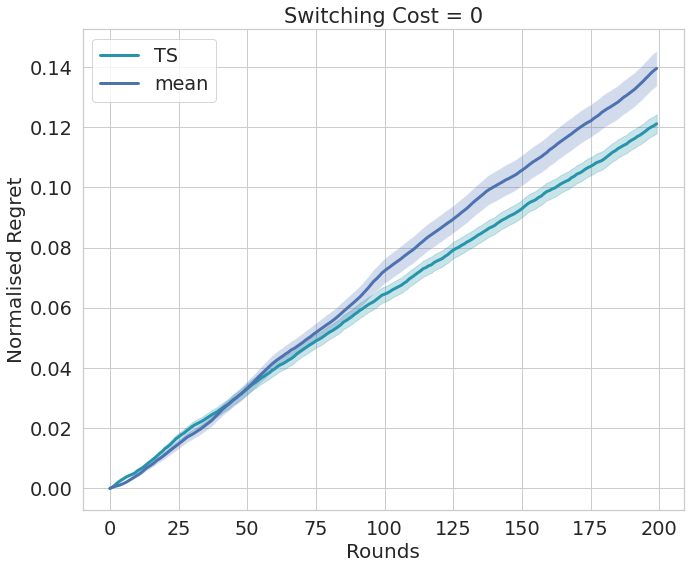

In [11]:
N = 250
T = 200

regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'result/DP_cost0.csv'), delimiter=',')
regret_record3 = np.genfromtxt(os.path.join(os.getcwd(),'mean_cost0.csv'), delimiter=',')


regret_cumsum2=np.cumsum(regret_record2,axis=1)
regret_cumsum3=np.cumsum(regret_record3,axis=1)



cumsum_average2=np.mean(regret_cumsum2,axis=0)
cumsum_average3=np.mean(regret_cumsum3,axis=0)


cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)
cumsum_std3=np.sqrt(np.var(regret_cumsum3,axis=0))/math.sqrt(N)

plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))



plt.plot(cumsum_average2,label='TS',linewidth=3,color='#2694ab')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='#2694ab', alpha=0.25)

plt.plot(cumsum_average3,label='mean',linewidth=3)
plt.fill_between(range(T), cumsum_average3-cumsum_std3, cumsum_average3+cumsum_std3, alpha=0.25)

plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Normalised Regret',fontsize=20)
plt.tight_layout()
plt.title('Switching Cost = 0')
plt.legend()

#plt.savefig('SC0.png')

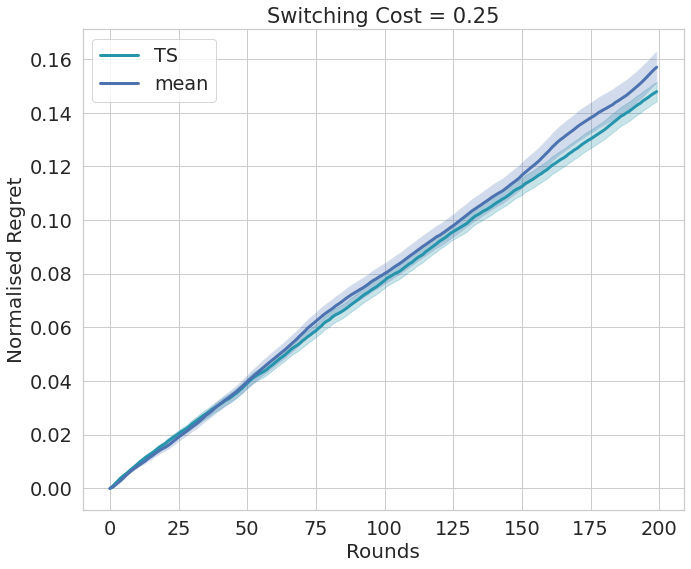

In [21]:
N = 250
T = 200

regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'DP_cost0.25.csv'), delimiter=',')
regret_record3 = np.genfromtxt(os.path.join(os.getcwd(),'mean_cost0.25.csv'), delimiter=',')


regret_cumsum2=np.cumsum(regret_record2,axis=1)
regret_cumsum3=np.cumsum(regret_record3,axis=1)



cumsum_average2=np.mean(regret_cumsum2,axis=0)
cumsum_average3=np.mean(regret_cumsum3,axis=0)


cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)
cumsum_std3=np.sqrt(np.var(regret_cumsum3,axis=0))/math.sqrt(N)

plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))



plt.plot(cumsum_average2,label='TS',linewidth=3,color='#2694ab')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='#2694ab', alpha=0.25)

plt.plot(cumsum_average3,label='mean',linewidth=3)
plt.fill_between(range(T), cumsum_average3-cumsum_std3, cumsum_average3+cumsum_std3, alpha=0.25)

plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Normalised Regret',fontsize=20)
plt.tight_layout()
plt.title('Switching Cost = 0.25')
plt.legend()

#plt.savefig('SC0.png')

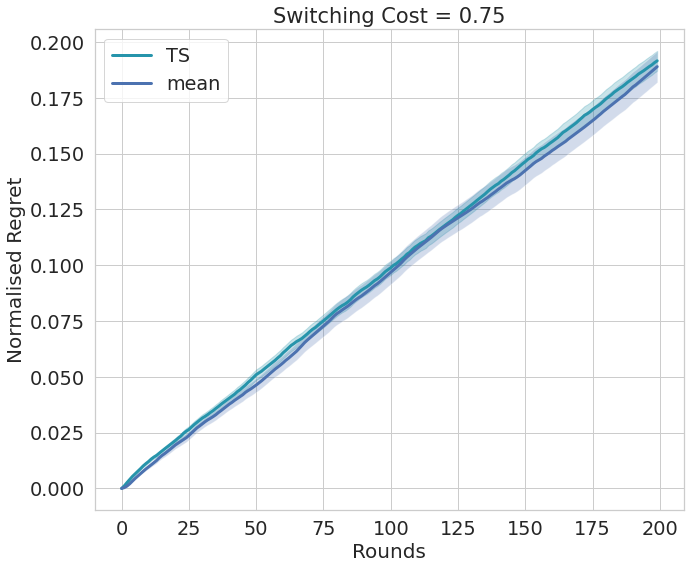

In [13]:
N = 250
T = 200

regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'result/DP_cost075_step_'+str(0)+'.csv'), delimiter=',')
regret_record3 = np.genfromtxt(os.path.join(os.getcwd(),'mean_cost0.75.csv'), delimiter=',')


regret_cumsum2=np.cumsum(regret_record2,axis=1)
regret_cumsum3=np.cumsum(regret_record3,axis=1)



cumsum_average2=np.mean(regret_cumsum2,axis=0)
cumsum_average3=np.mean(regret_cumsum3,axis=0)


cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)
cumsum_std3=np.sqrt(np.var(regret_cumsum3,axis=0))/math.sqrt(N)

plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))



plt.plot(cumsum_average2,label='TS',linewidth=3,color='#2694ab')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='#2694ab', alpha=0.25)

plt.plot(cumsum_average3,label='mean',linewidth=3)
plt.fill_between(range(T), cumsum_average3-cumsum_std3, cumsum_average3+cumsum_std3, alpha=0.25)

plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Normalised Regret',fontsize=20)
plt.tight_layout()
plt.title('Switching Cost = 0.75')
plt.legend()

#plt.savefig('SC0.png')

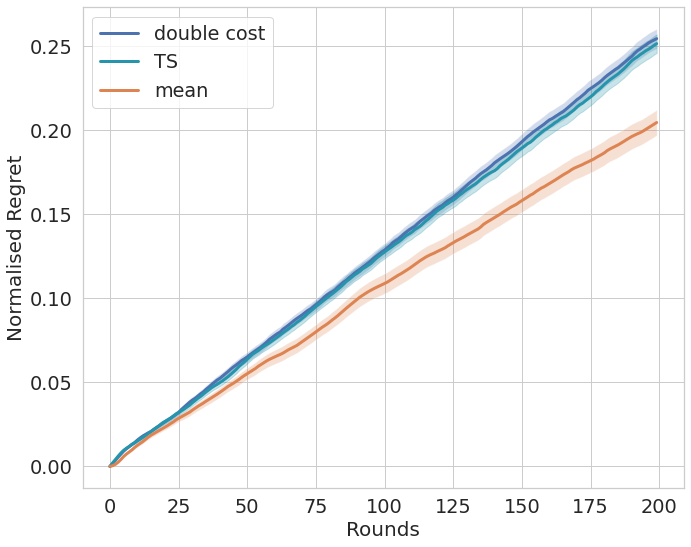

In [10]:
N = 250
T = 200

regret_record1 = np.genfromtxt(os.path.join(os.getcwd(),'2DP_cost1.5.csv'), delimiter=',')
regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'result/DP_cost1_5.csv'), delimiter=',')
regret_record3 = np.genfromtxt(os.path.join(os.getcwd(),'result/mean_cost1.5.csv'), delimiter=',')

regret_cumsum1=np.cumsum(regret_record1,axis=1)
regret_cumsum2=np.cumsum(regret_record2,axis=1)
regret_cumsum3=np.cumsum(regret_record3,axis=1)


cumsum_average1=np.mean(regret_cumsum1,axis=0)
cumsum_average2=np.mean(regret_cumsum2,axis=0)
cumsum_average3=np.mean(regret_cumsum3,axis=0)

cumsum_std1=np.sqrt(np.var(regret_cumsum1,axis=0))/math.sqrt(N)
cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)
cumsum_std3=np.sqrt(np.var(regret_cumsum3,axis=0))/math.sqrt(N)

plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

plt.plot(cumsum_average1,label='double cost',linewidth=3)
plt.fill_between(range(T), cumsum_average1-cumsum_std1, cumsum_average1+cumsum_std1, alpha=0.25)

plt.plot(cumsum_average2,label='TS',linewidth=3,color='#2694ab')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='#2694ab', alpha=0.25)

plt.plot(cumsum_average3,label='mean',linewidth=3)
plt.fill_between(range(T), cumsum_average3-cumsum_std3, cumsum_average3+cumsum_std3, alpha=0.25)

plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Normalised Regret',fontsize=20)
plt.tight_layout()
plt.legend()
#plt.title('Switching Cost 

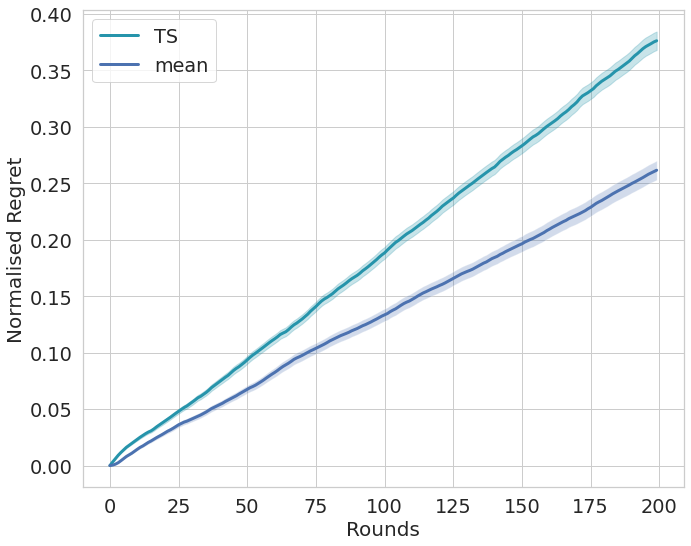

In [16]:
N = 250
T = 200


regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'result/DP_cost3.csv'), delimiter=',')
regret_record3 = np.genfromtxt(os.path.join(os.getcwd(),'mean_cost3.csv'), delimiter=',')


regret_cumsum2=np.cumsum(regret_record2,axis=1)
regret_cumsum3=np.cumsum(regret_record3,axis=1)



cumsum_average2=np.mean(regret_cumsum2,axis=0)
cumsum_average3=np.mean(regret_cumsum3,axis=0)


cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)
cumsum_std3=np.sqrt(np.var(regret_cumsum3,axis=0))/math.sqrt(N)

plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))


plt.plot(cumsum_average2,label='TS',linewidth=3,color='#2694ab')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2,color='#2694ab', alpha=0.25)

plt.plot(cumsum_average3,label='mean',linewidth=3)
plt.fill_between(range(T), cumsum_average3-cumsum_std3, cumsum_average3+cumsum_std3, alpha=0.25)

plt.xlabel('Rounds',fontsize=20)
plt.ylabel('Normalised Regret',fontsize=20)
plt.tight_layout()
plt.legend()
#plt.title('Switching Cost 

Step control

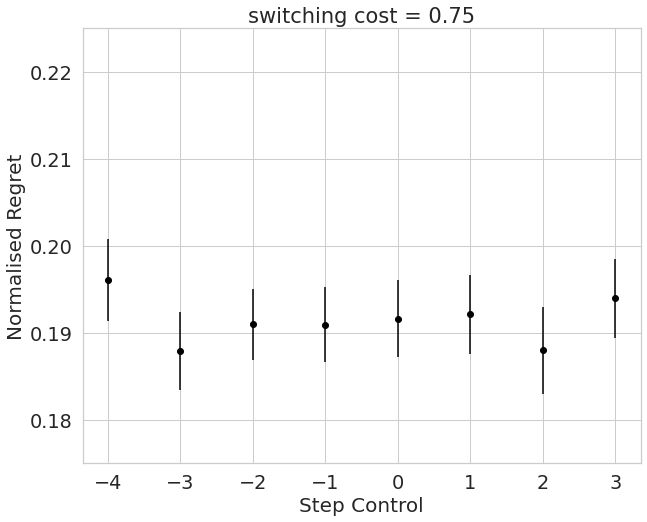

In [5]:
#data = []
steps=[-4, -3,-2,-1,0,1,2,3]

plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

for control in steps:
    N = 250
    T = 200

    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'result/DP_cost075_step_'+str(control)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)[-1]
    cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))[-1]
    
    #plt.scatter(control,cumsum_average)
    plt.errorbar(control, cumsum_average, yerr=cumsum_std, fmt="o",color='black')
    plt.ylim(0.175,0.225)
    plt.xlabel('Step Control',fontsize=20)
    plt.ylabel('Normalised Regret',fontsize=20)
    
    
    #data.append(regret_cumsum[:,-1])
    
plt.title('switching cost = 0.75')

plt.savefig('SC075_stepcontrol.png')

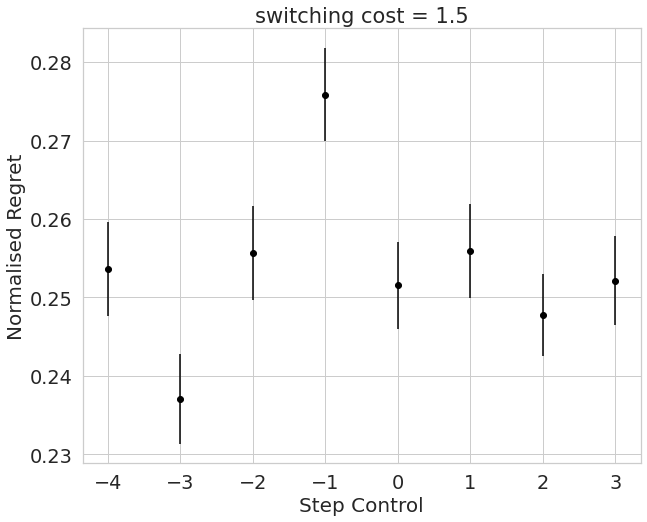

In [6]:
#data = []
steps=[-4, -3,-2,-1,0,1,2,3]

plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

for control in steps:
    N = 250
    T = 200

    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'result/DP_cost15_step_'+str(control)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)[-1]
    cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))[-1]
    
    #plt.scatter(control,cumsum_average)
    plt.errorbar(control, cumsum_average, yerr=cumsum_std, fmt="o",color='black')
    #plt.ylim(0.175,0.225)
    plt.xlabel('Step Control',fontsize=20)
    plt.ylabel('Normalised Regret',fontsize=20)
    
    
    #data.append(regret_cumsum[:,-1])
    
plt.title('switching cost = 1.5')
plt.savefig('SC15_stepcontrol.png')

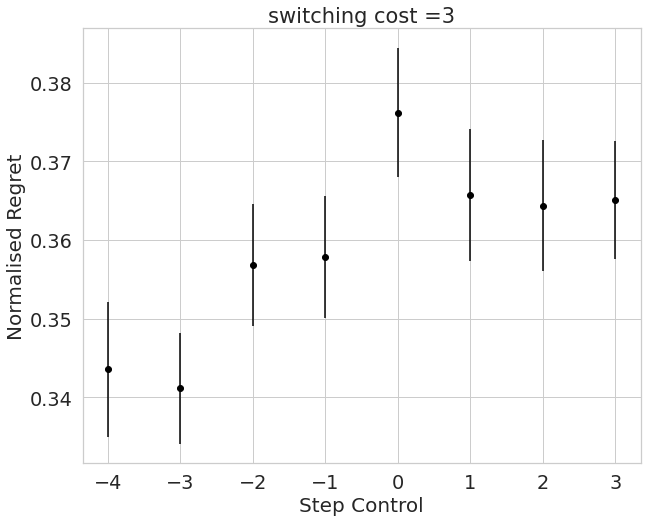

In [7]:
#data = []
steps=[-4, -3,-2,-1,0,1,2,3]

plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

for control in steps:
    N = 250
    T = 200

    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'result/cost3_step_control_'+str(control)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)[-1]
    cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))[-1]
    
    #plt.scatter(control,cumsum_average)
    plt.errorbar(control, cumsum_average, yerr=cumsum_std, fmt="o",color='black')
    #plt.ylim(0.175,0.225)
    plt.xlabel('Step Control',fontsize=20)
    plt.ylabel('Normalised Regret',fontsize=20)
    
    
    #data.append(regret_cumsum[:,-1])
    
plt.title('switching cost =3')
plt.savefig('plots/SC3_stepcontrol.png')

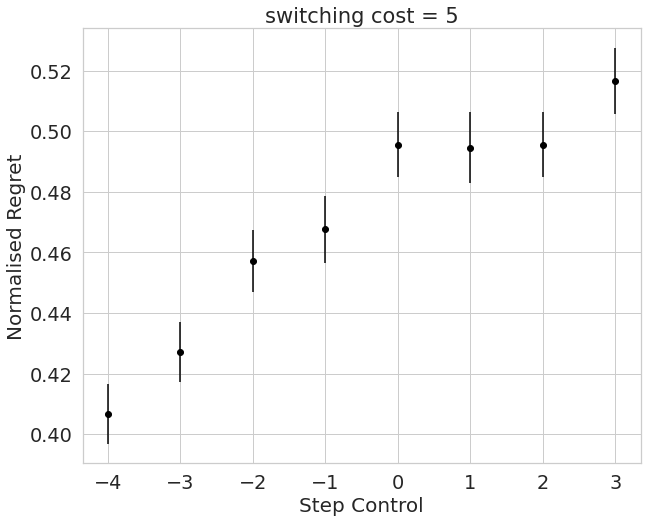

In [8]:
#data = []
steps=[-4, -3,-2,-1,0,1,2,3]

plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

for control in steps:
    N = 250
    T = 200

    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'result/DP_cost5_step_'+str(control)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)[-1]
    cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))[-1]
    
    #plt.scatter(control,cumsum_average)
    plt.errorbar(control, cumsum_average, yerr=cumsum_std, fmt="o",color='black')
    #plt.ylim(0.175,0.225)
    plt.xlabel('Step Control',fontsize=20)
    plt.ylabel('Normalised Regret',fontsize=20)
    
    
    #data.append(regret_cumsum[:,-1])
    
plt.title('switching cost = 5')
plt.savefig('plots/SC5_stepcontrol.png')

Text(0.5, 1.0, 'switching cost = 7')

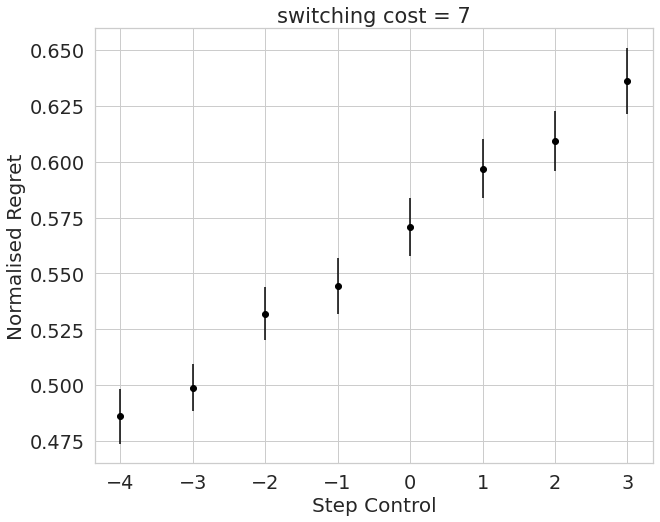

In [10]:
#data = []
steps=[-4, -3,-2,-1,0,1,2,3]

plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

for control in steps:
    N = 250
    T = 200

    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'result/DP_cost7_step_'+str(control)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)[-1]
    cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))[-1]
    
    #plt.scatter(control,cumsum_average)
    plt.errorbar(control, cumsum_average, yerr=cumsum_std, fmt="o",color='black')
    #plt.ylim(0.175,0.225)
    plt.xlabel('Step Control',fontsize=20)
    plt.ylabel('Normalised Regret',fontsize=20)
    
    
    #data.append(regret_cumsum[:,-1])
    
plt.title('switching cost = 7')
#plt.savefig('plots/SC7_stepcontrol.png')

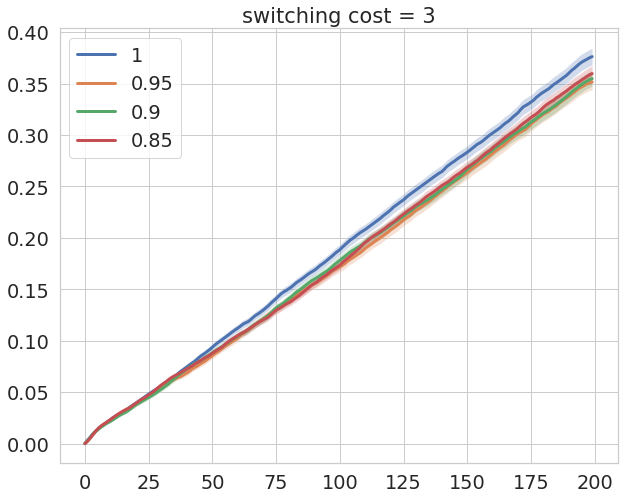

In [6]:
discount_factor_holder=[0.95,0.9,0.85]
plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

regret_record = np.genfromtxt(os.path.join(os.getcwd(),'result/DP_cost3.csv'), delimiter=',')
regret_cumsum=np.cumsum(regret_record,axis=1)
cumsum_average=np.mean(regret_cumsum,axis=0)
cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))
plt.plot(cumsum_average,linewidth=3,label='1')
plt.fill_between(range(T), cumsum_average-cumsum_std, cumsum_average+cumsum_std, alpha=0.25)

for df in discount_factor_holder:
    N = 250
    T = 200

    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'result/DP_cost3_discount_'+str(df)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)
    cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))
    
    plt.plot(cumsum_average,linewidth=3,label=str(df))
    plt.fill_between(range(T), cumsum_average-cumsum_std, cumsum_average+cumsum_std, alpha=0.25)

plt.legend()

plt.title('switching cost = 3')
plt.savefig('plots/SC3_discount.png')

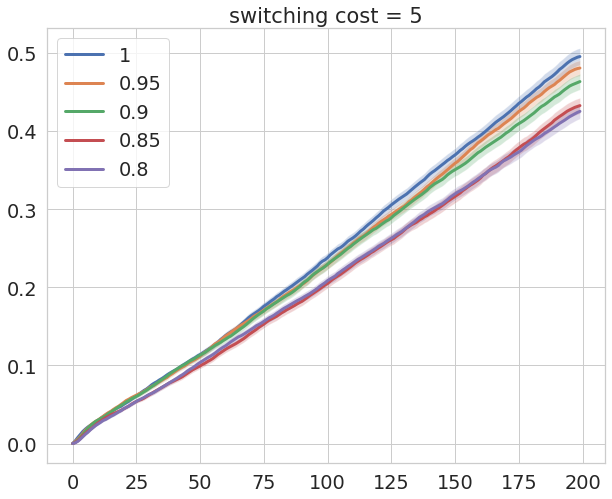

In [7]:
discount_factor_holder=[0.95,0.9,0.85,0.8]
plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

regret_record = np.genfromtxt(os.path.join(os.getcwd(),'result/DP_cost5.csv'), delimiter=',')
regret_cumsum=np.cumsum(regret_record,axis=1)
cumsum_average=np.mean(regret_cumsum,axis=0)
cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))
plt.plot(cumsum_average,linewidth=3,label='1')
plt.fill_between(range(T), cumsum_average-cumsum_std, cumsum_average+cumsum_std, alpha=0.25)

for df in discount_factor_holder:
    N = 250
    T = 200

    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'result/DP_cost5_discount_'+str(df)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)
    cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))
    
    plt.plot(cumsum_average,linewidth=3,label=str(df))
    plt.fill_between(range(T), cumsum_average-cumsum_std, cumsum_average+cumsum_std, alpha=0.25)

plt.legend()

plt.title('switching cost = 5')
plt.savefig('plots/SC5_discount.png')

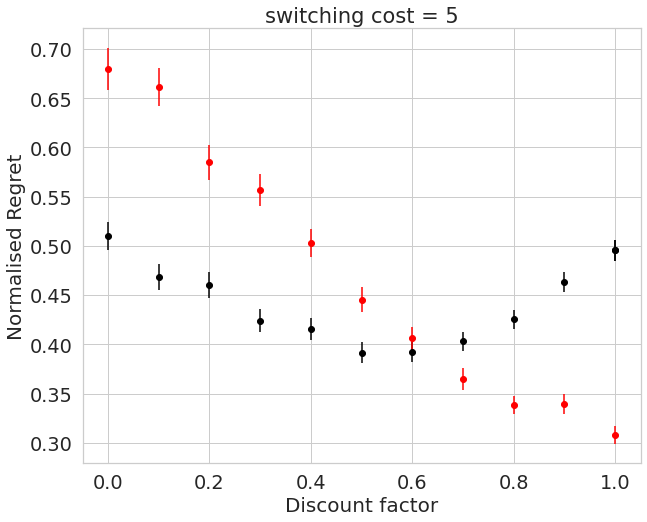

In [7]:
discount_factor_holder=[1.0, 0.9,0.8, 0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.]
plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

N = 250
T = 200

regret_record = np.genfromtxt(os.path.join(os.getcwd(),'result/DP_cost5_step_0.csv'), delimiter=',')
regret_cumsum=np.cumsum(regret_record,axis=1)
cumsum_average=np.mean(regret_cumsum,axis=0)[-1]
cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))[-1]
plt.errorbar(1., cumsum_average, yerr=cumsum_std, fmt="o",color='black')

for df in discount_factor_holder:
    N = 250
    T = 200

    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'result/DP_cost5_discount_'+str(df)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)[-1]
    cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))[-1]
    
    #plt.scatter(control,cumsum_average)
    plt.errorbar(df, cumsum_average, yerr=cumsum_std, fmt="o",color='black')
    #plt.ylim(0.175,0.225)
    plt.xlabel('Discount factor',fontsize=20)
    plt.ylabel('Normalised Regret',fontsize=20)
    
    
    
    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'result/mean_DP_cost5_discount_'+str(df)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)[-1]
    cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))[-1]
    
    #plt.scatter(control,cumsum_average)
    plt.errorbar(df, cumsum_average, yerr=cumsum_std, fmt="o",color='red',label='mean')
    #plt.ylim(0.175,0.225)
    plt.xlabel('Discount factor',fontsize=20)
    plt.ylabel('Normalised Regret',fontsize=20)
    
    
    #data.append(regret_cumsum[:,-1])
    
plt.title('switching cost = 5')
plt.savefig('plots/SC5_discount.png')

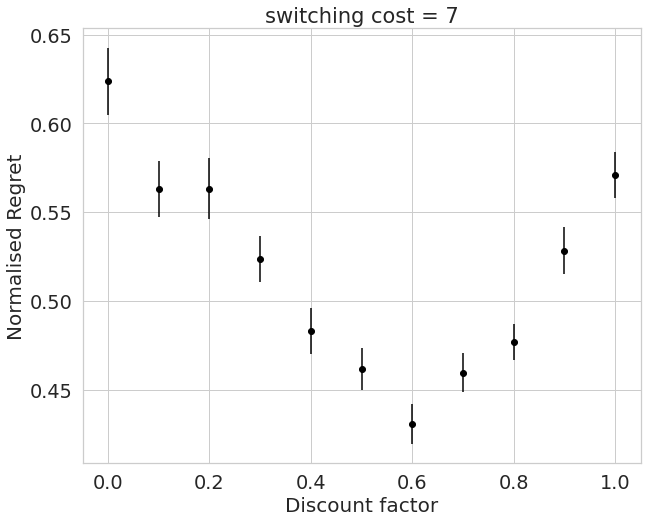

In [4]:
discount_factor_holder=[0.9,0.8, 0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.]
plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

regret_record = np.genfromtxt(os.path.join(os.getcwd(),'result/DP_cost7_step_0.csv'), delimiter=',')
regret_cumsum=np.cumsum(regret_record,axis=1)
cumsum_average=np.mean(regret_cumsum,axis=0)[-1]
cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))[-1]
plt.errorbar(1., cumsum_average, yerr=cumsum_std, fmt="o",color='black')

for df in discount_factor_holder:
    N = 250
    T = 200

    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'result/DP_cost7_discount_'+str(df)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)[-1]
    cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))[-1]
    
    #plt.scatter(control,cumsum_average)
    plt.errorbar(df, cumsum_average, yerr=cumsum_std, fmt="o",color='black')
    #plt.ylim(0.175,0.225)
    plt.xlabel('Discount factor',fontsize=20)
    plt.ylabel('Normalised Regret',fontsize=20)
    
    
    #data.append(regret_cumsum[:,-1])
    
plt.title('switching cost = 7')
plt.savefig('plots/SC7_discount.png')

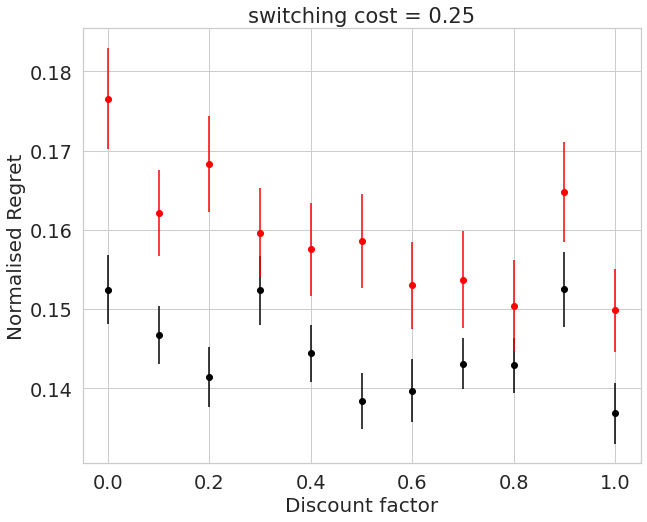

In [8]:
discount_factor_holder=[1., 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.]

plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

for df in discount_factor_holder:
    N = 250
    T = 200

    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'result/DP_cost0.25_discount_'+str(df)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)[-1]
    cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))[-1]
    
    #plt.scatter(control,cumsum_average)
    plt.errorbar(df, cumsum_average, yerr=cumsum_std, fmt="o",color='black',label='TS')
    #plt.ylim(0.175,0.225)
    plt.xlabel('Discount factor',fontsize=20)
    plt.ylabel('Normalised Regret',fontsize=20)
    
    
    #data.append(regret_cumsum[:,-1])
    
    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'result/mean_DP_cost0.25_discount_'+str(df)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)[-1]
    cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))[-1]
    
    #plt.scatter(control,cumsum_average)
    plt.errorbar(df, cumsum_average, yerr=cumsum_std, fmt="o",color='red',label='mean')
    #plt.ylim(0.175,0.225)
    plt.xlabel('Discount factor',fontsize=20)
    plt.ylabel('Normalised Regret',fontsize=20)
    
plt.title('switching cost = 0.25')
plt.savefig('plots/SC0.25_discount.png')

Text(0.5, 1.0, 'switching cost = 1')

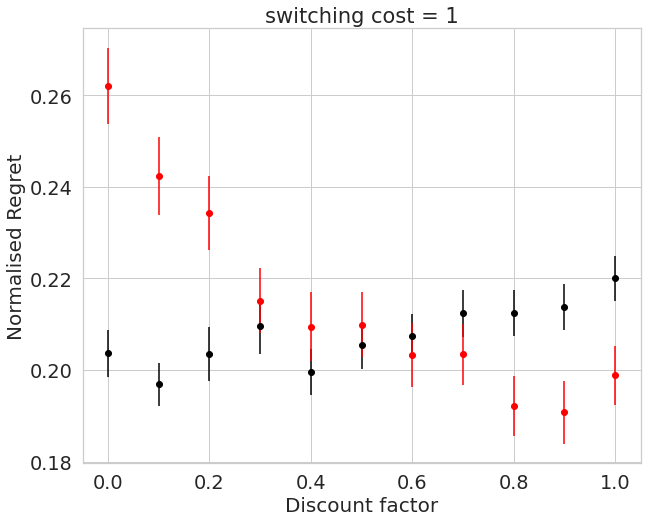

In [7]:
discount_factor_holder=[1., 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.]

plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

for df in discount_factor_holder:
    N = 250
    T = 200

    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'result/DP_cost1_discount_'+str(df)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)[-1]
    cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))[-1]
    
    #plt.scatter(control,cumsum_average)
    plt.errorbar(df, cumsum_average, yerr=cumsum_std, fmt="o",color='black',label='TS')
    #plt.ylim(0.175,0.225)
    plt.xlabel('Discount factor',fontsize=20)
    plt.ylabel('Normalised Regret',fontsize=20)
    
    
    #data.append(regret_cumsum[:,-1])
    
    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'result/mean_DP_cost1_discount_'+str(df)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)[-1]
    cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))[-1]
    
    #plt.scatter(control,cumsum_average)
    plt.errorbar(df, cumsum_average, yerr=cumsum_std, fmt="o",color='red',label='mean')
    #plt.ylim(0.175,0.225)
    plt.xlabel('Discount factor',fontsize=20)
    plt.ylabel('Normalised Regret',fontsize=20)
    
plt.title('switching cost = 1')
#plt.savefig('plots/SC10_discount.png')

Text(0.5, 1.0, 'switching cost = 10')

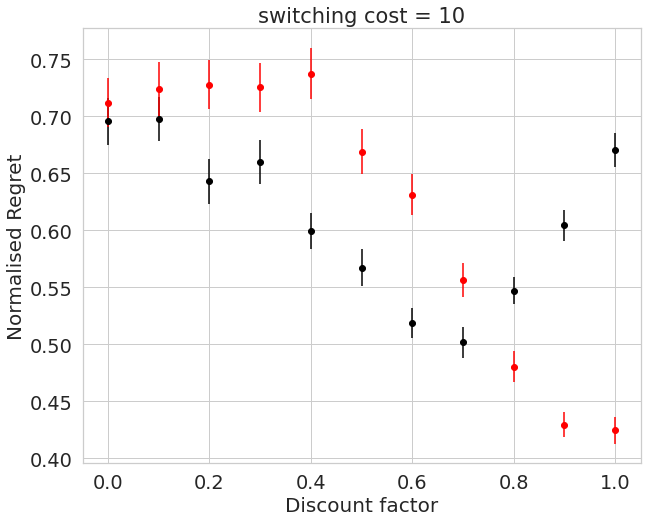

In [4]:
discount_factor_holder = [1., 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.]

plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

for df in discount_factor_holder:
    N = 250
    T = 200

    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'result/DP_cost10_discount_'+str(df)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)[-1]
    cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))[-1]
    
    #plt.scatter(control,cumsum_average)
    plt.errorbar(df, cumsum_average, yerr=cumsum_std, fmt="o",color='black',label='TS')
    #plt.ylim(0.175,0.225)
    plt.xlabel('Discount factor',fontsize=20)
    plt.ylabel('Normalised Regret',fontsize=20)
    
    
    #data.append(regret_cumsum[:,-1])
    
    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'result/mean_DP_cost10_discount_'+str(df)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)[-1]
    cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))[-1]
    
    #plt.scatter(control,cumsum_average)
    plt.errorbar(df, cumsum_average, yerr=cumsum_std, fmt="o",color='red',label='mean')
    #plt.ylim(0.175,0.225)
    plt.xlabel('Discount factor',fontsize=20)
    plt.ylabel('Normalised Regret',fontsize=20)
    
plt.title('switching cost = 10')
#plt.savefig('plots/SC10_discount.png')